In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, max_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df_option = pd.read_pickle("dev_df_final_jointed_all_train_beta.pkl")

In [ ]:
#def is_third_friday(date_ts):
#    return date_ts.weekday() == 4 and 15 <= date_ts.day <= 21

In [3]:
df_option.columns

Index(['Target_std', 'Target_spread', 'prior_std', 'prior_Vol', 'prior_spread',
       'prior_range', 'cut_open', 'cut_1hr', 'cut_2hr', 'cut_3hr',
       'vix_prior_std', 'vix_pr_spread', 'vix_prior_range', 'vix_cut_open',
       'vix_cut_1hr', 'vix_cut_2hr', 'vix_cut_3hr', 'tqqq_prior_std',
       'tqqq_Vol', 'tqqq_pr_spread', 'tqqq_prior_range', 'tqqq_cut_open',
       'tqqq_cut_1hr', 'tqqq_cut_2hr', 'tqqq_cut_3hr'],
      dtype='object')

In [4]:
len(df_option.columns)

25

In [ ]:
#df_option.drop(['Class_target','vix_class', 'tqqq_class'], axis=1, inplace =True)

In [ ]:
#sns.pairplot(df_option[['Target_std','prior_std','vix_prior_std','tqqq_prior_std']], hue='Target_std')

---
---

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_option.corr(numeric_only=True),cmap='viridis',annot=True)

In [ ]:
df_option.Target_std.plot.hist()

In [ ]:
#sns.catplot(x='OP_EXP',y='Target_std',data=df_option, kind='box')

In [6]:
df_option.reset_index(inplace=True)

## Splitting the Data


In [ ]:
# spread or Std model

In [7]:
# X = df_option.drop(['Date_Only','Target_std','Target_spread'], axis=1)  
# #y = df_option['Target_std']
# y = df_option['Target_spread']

In [22]:
X = df_option.drop(['Date_Only','Target_std','Target_spread'], axis=1)  
#y = df_option['Target_std']
y = df_option['Target_std']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [24]:
X_train.columns

Index(['prior_std', 'prior_Vol', 'prior_spread', 'prior_range', 'cut_open',
       'cut_1hr', 'cut_2hr', 'cut_3hr', 'vix_prior_std', 'vix_pr_spread',
       'vix_prior_range', 'vix_cut_open', 'vix_cut_1hr', 'vix_cut_2hr',
       'vix_cut_3hr', 'tqqq_prior_std', 'tqqq_Vol', 'tqqq_pr_spread',
       'tqqq_prior_range', 'tqqq_cut_open', 'tqqq_cut_1hr', 'tqqq_cut_2hr',
       'tqqq_cut_3hr'],
      dtype='object')

In [25]:
X_train.shape

(230, 23)

In [26]:
y_train.shape

(230,)

## Evaluation Run Model with the Data


In [12]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test,preds)
    print(f'mae : {mae}')
   
    
    plt.figure(figsize=(12,8),dpi=200)
    plt.scatter(y_test, preds)
    plt.plot(y_test, y_test, color='green', linestyle='dashed')
    plt.xlabel('real_std')

    return model

In [ ]:
# Define the parameter grid for GridSearchCV
dt_regressor = DecisionTreeRegressor()

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

In [ ]:
grid_search = GridSearchCV(
    estimator=dt_regressor,  # The model to tune
    param_grid=param_grid,  # The parameter grid
    scoring='neg_root_mean_squared_error',  # Or other relevant scoring metric
    cv=10,  # Number of cross-validation folds
    verbose=2,  # Show progress
    n_jobs=-1  # Use all available cores
)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters
best_params_tr = grid_search.best_params_
print("Best parameters:", best_params_tr)

# Get the best model
best_model_tr = grid_search.best_estimator_

In [ ]:
run_model(best_model_tr,X_train, y_train, X_test, y_test)

In [ ]:
pd.DataFrame(index=X.columns, data = best_model_tr.feature_importances_, columns=['features'])

In [ ]:
# import joblib
# # Assuming 'model' is your trained model object
# filename = 'tr_model_beta_33.joblib'
# joblib.dump(best_model_tr, filename)


In [ ]:
### Default Decison Tree model

In [ ]:
dt_regressor_default = DecisionTreeRegressor()

In [ ]:
dt_model = run_model(dt_regressor_default,X_train, y_train, X_test, y_test)

In [ ]:
## RF Grid Search

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
rf_best_model = grid_search.best_estimator_
y_pred = rf_best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

In [ ]:
pd.DataFrame(index=X.columns,data=rf_best_model.feature_importances_,columns=['Feature Importance'])

In [ ]:
import joblib
# Assuming 'model' is your trained model object
filename = 'rf_model.joblib'
joblib.dump(rf_best_model, filename)

# To load the model later:
#loaded_model = joblib.load(filename)

In [ ]:
run_model(rf_best_model,X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# Instantiate Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=10)

# Instantiate Grid Search
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_tree = grid_search.best_estimator_

# Evaluate the best model on the test set (optional)
test_score = best_tree.score(X_test, y_test)
print("Test score:", test_score)

In [ ]:
best_tree.feature_importances_

In [ ]:
pd.DataFrame(index=X.columns,data=best_tree.feature_importances_,columns=['Feature Importance'])

In [ ]:
run_model(best_tree,X_train, y_train, X_test, y_test)

In [ ]:
filename = 'btr_model_36.joblib'
joblib.dump(best_tree, filename)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))
plot_tree(best_tree);

----

## KNN Regression

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test,preds)
    print(f'mae : {mae}')
   
    
    plt.figure(figsize=(12,8),dpi=200)
    plt.scatter(y_test, preds)
    plt.xlabel('real_std')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
preds = {}
k_values = [3,4,5,6]
for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
model.get_n_leaves()

----

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scaler = StandardScaler()
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)

In [ ]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [ ]:
grid = GridSearchCV(svr,param_grid)

In [ ]:
run_model(grid,sc_X_train,y_train,sc_X_test,y_test)

In [ ]:
scaler_filename = "scaler4svr.save"
joblib.dump(scaler, scaler_filename)

In [ ]:
SVR_model = grid.best_estimator_

In [ ]:
filename = 'SVR_model_35.joblib'
joblib.dump(SVR_model, filename)

---

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# help(RandomForestRegressor)

In [ ]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# help(GradientBoostingRegressor)

In [ ]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [15]:
from sklearn.ensemble import AdaBoostRegressor

In [16]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

NameError: name 'GradientBoostingRegressor' is not defined

In [ ]:
## XGBOOST

In [ ]:
!pip install xgboost

In [27]:
import xgboost as xgb
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Initialize XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=10,
                           verbose=0,
                          n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.sqrt(-grid_search.best_score_))

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Best score: 0.6550662070025494
Test RMSE: 0.5140885540429163


mae : 0.4135913150188252


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

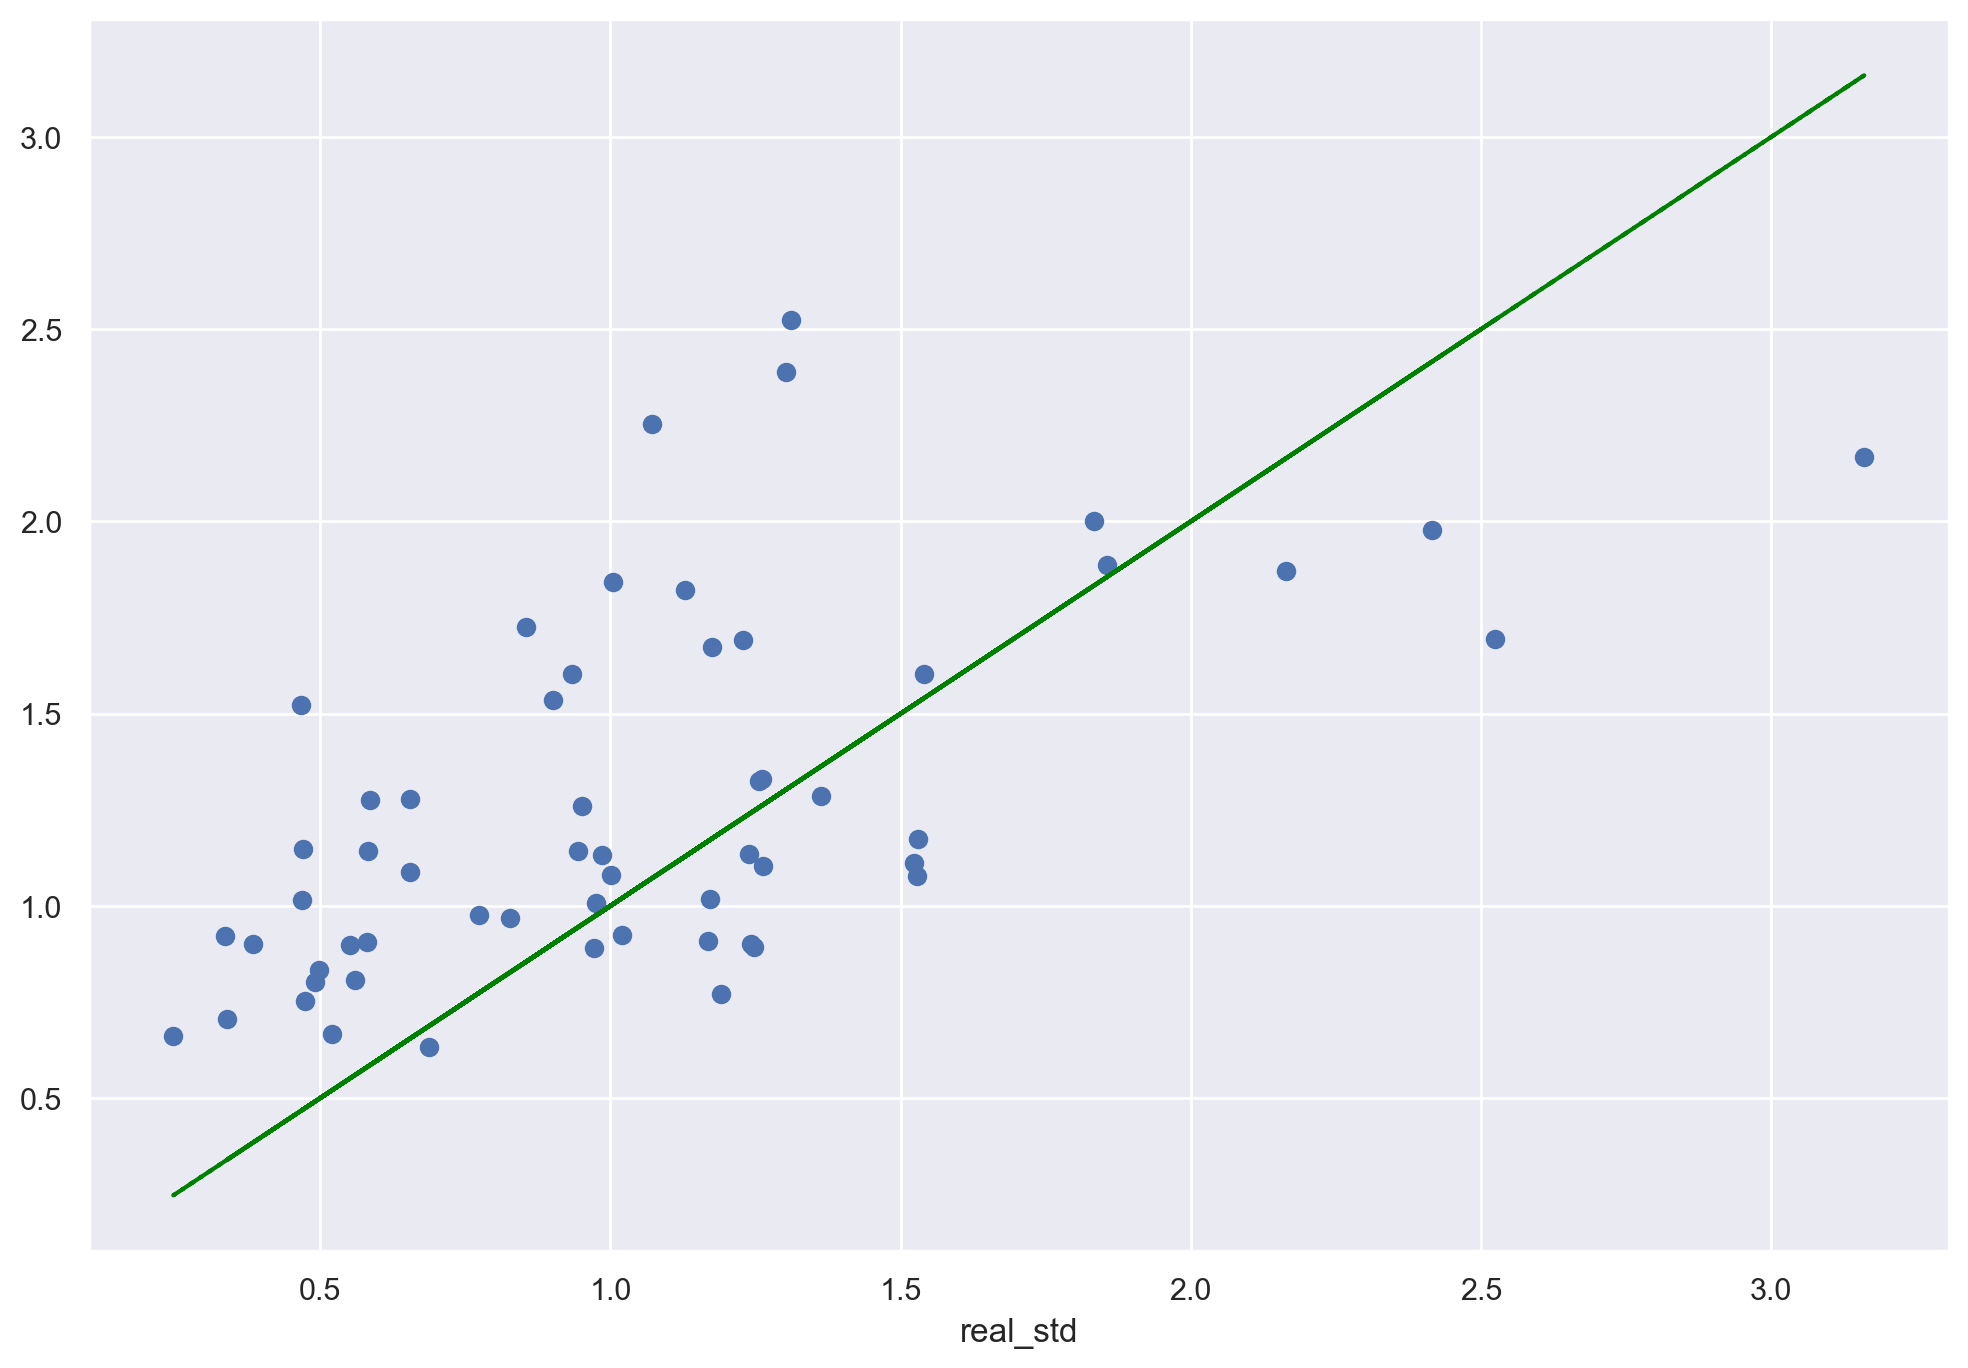

In [28]:
run_model(best_xgb_model,X_train,y_train,X_test,y_test)

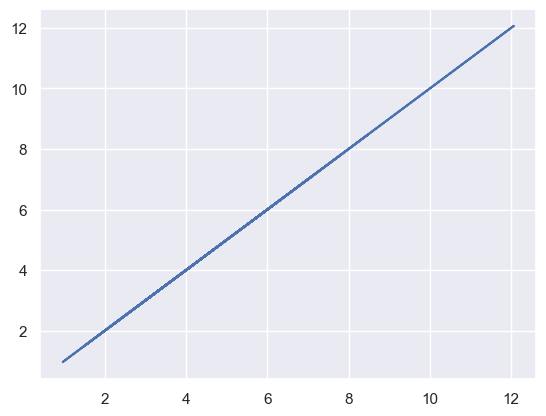

In [19]:
plt.plot(y_test, y_test)

In [20]:
pd.DataFrame(index=X.columns,data=best_xgb_model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
prior_std,0.046459
prior_Vol,0.058637
prior_spread,0.041870
prior_range,0.014768
cut_open,0.041954
cut_1hr,0.061587
cut_2hr,0.017211
cut_3hr,0.018943
vix_prior_std,0.063162
vix_pr_spread,0.069696


In [29]:
import joblib
# Assuming 'model' is your trained model object
filename = 'xgb_model_w_all_std.joblib'
joblib.dump(best_xgb_model, filename)


['xgb_model_w_all_std.joblib']

----